(friends-s01:r2_maps)=
# R2 maps 
Before generating summary distributions of R2 embedding quality, as presented in Section {ref}`friends-s01:r2_cortex`, we wanted to visually inspect the maps. The figures presented here are for subject `sub-01`, but similar observations were made for all subjects. When executed in an interactive environment, it is possible to explore the results of other subject by changing the value of the variable `subject` in the code below. 

```{admonition} Computational reproducibility 
The results for this experiment have been precomputed usin the scripts `xx.py` and `xx.sh`. The results are accessed using a number of helper tools available in the `dypac_utils` module. The following hidden block of code loads the necessary libraries to generate the figures.
```

In [1]:
import matplotlib.pyplot as plt
from nilearn import plotting
from cneuromod_embeddings.dypac_utils import get_root_data, load_dypac, load_r2_intra, load_r2_inter, load_r2_other, mean_r2, mean_inter_r2

## R2 with `fwhm=5`

The following brain slices present R2 maps using individual DYPAC parcellations (`cluster-300_state-900`). On the left, the embedding fMRI time series and the parcels come from the same subject (intra-subject R2), and on the right from different subjects (inter-subject R2). The values for intra-subject R2 are clearly much higher than for inter-subject R2. Values in central structures (basal ganglia and thalami are very low, and do not even use the low 0.1 threshold applied on the visualization). A similar observation can be done for the cerebellum.

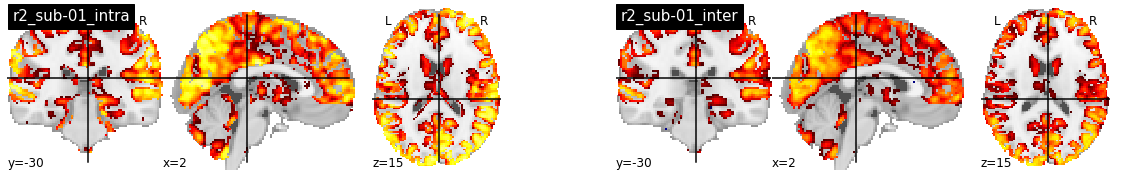

In [2]:
subject = 'sub-01'
fwhm = '5'
cluster = 300
state = 900
root_data = get_root_data('friends-s01')
model, mask_img = load_dypac(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)

width_fig = 20
fig = plt.figure(figsize=(width_fig, 3))
hdf5_file = load_r2_intra(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
r2_intra = mean_r2(hdf5_file['validation'], ref_img=mask_img)
plotting.plot_stat_map(r2_intra, cut_coords=[2, -30, 15], display_mode='ortho', threshold=0.1, 
    vmax=1, title=f'r2_{subject}_intra', colorbar=False, axes=plt.subplot(1, 2, 1))
hdf5_file = load_r2_inter(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
r2_inter = mean_inter_r2(hdf5_file['inter'], ref_img=mask_img)
plotting.plot_stat_map(r2_inter, cut_coords=[2, -30, 15], display_mode='ortho', threshold=0.1, 
    vmax=1, title=f'r2_{subject}_inter', colorbar=False, axes=plt.subplot(1, 2, 2))

When using group parcellations, the R2 values are quite low, except for the DIFUMO parcellations which are known for the quality of embedding fMRI activation maps {cite}`Dadi2020-gb`. However, the R2 in the central structures and the cerebellum also appear to be lower than the cortex. The Schaefer parcellation in particular does not cover central structures, and the R2 is consequently 0.

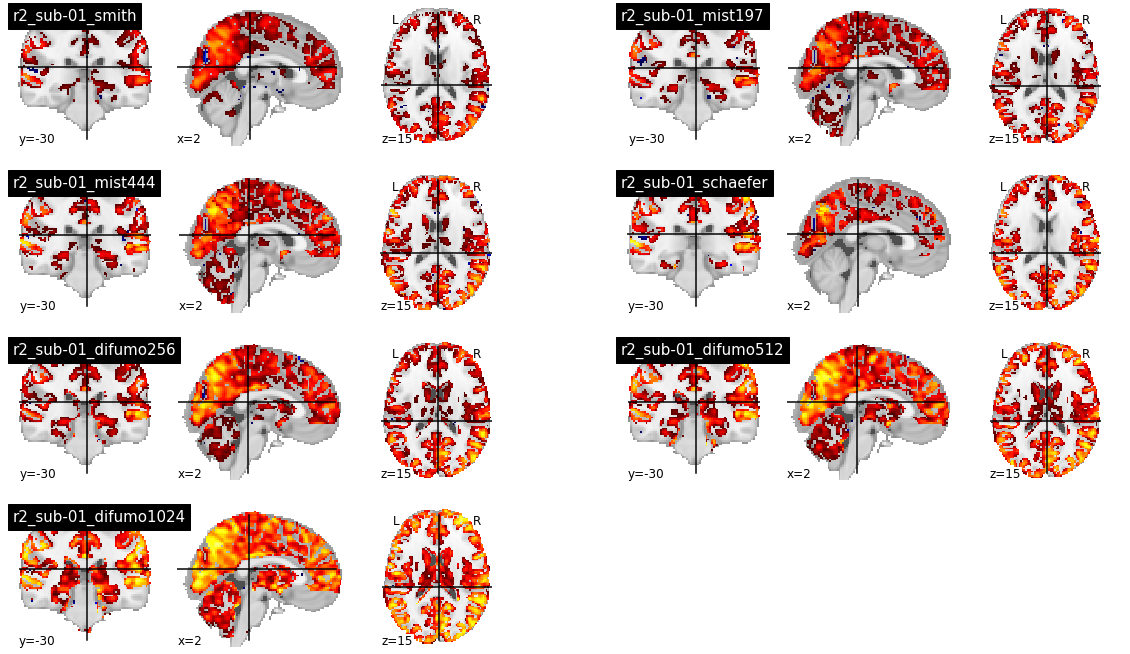

In [3]:
list_atlas = ['smith', 'mist197', 'mist444', 'schaefer', 'difumo256', 'difumo512', 'difumo1024']
n_comp = len(list_atlas)
width_fig = 20
fig = plt.figure(figsize=(width_fig, n_comp * 3))

for ind, atlas in enumerate(list_atlas):
    hdf5_file = load_r2_other(atlas=atlas, root_data=root_data, fwhm=fwhm)
    r2_atlas = mean_r2(hdf5_file[subject], ref_img=mask_img)
    plotting.plot_stat_map(r2_atlas, cut_coords=[2, -30, 15], display_mode='ortho', threshold=0.1, 
            vmax=1, title=f'r2_{subject}_{atlas}', colorbar=False, 
            axes=plt.subplot(n_comp, 2, ind + 1))

## R2 with `fwhm=8`
With `fwhm=8` the intra-subject R2 values are much higher, reaching very high values (`>0.7`) in most of the cortex. Intrestingly, the R2 values in central structures and the cerebellum also increase substantially. The inter-subject R2 are still lower than intra-subject R2, but they also increase compared with `fwhm=5`.

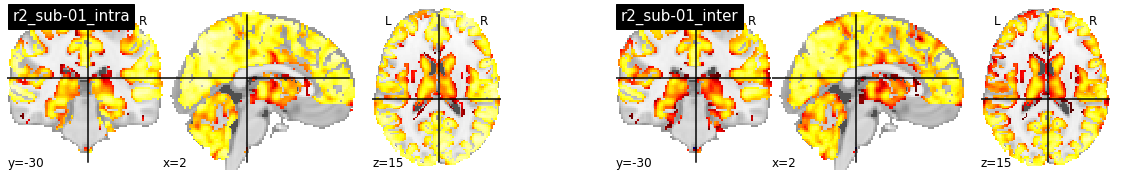

In [4]:
fwhm = '8'
model, mask_img = load_dypac(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)

fig = plt.figure(figsize=(width_fig, 3))
hdf5_file = load_r2_intra(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
r2_intra = mean_r2(hdf5_file['validation'], ref_img=mask_img)
plotting.plot_stat_map(r2_intra, cut_coords=[2, -30, 15], display_mode='ortho', threshold=0.1,
    vmax=1, title=f'r2_{subject}_intra', colorbar=False, axes=plt.subplot(1, 2, 1))
hdf5_file = load_r2_inter(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
r2_inter = mean_inter_r2(hdf5_file['inter'], ref_img=mask_img)
plotting.plot_stat_map(r2_inter, cut_coords=[2, -30, 15], display_mode='ortho', threshold=0.1,
    vmax=1, title=f'r2_{subject}_inter', colorbar=False, axes=plt.subplot(1, 2, 2))

For group parcellations, the R2 values also increase, including the central structures and the cerebellum.

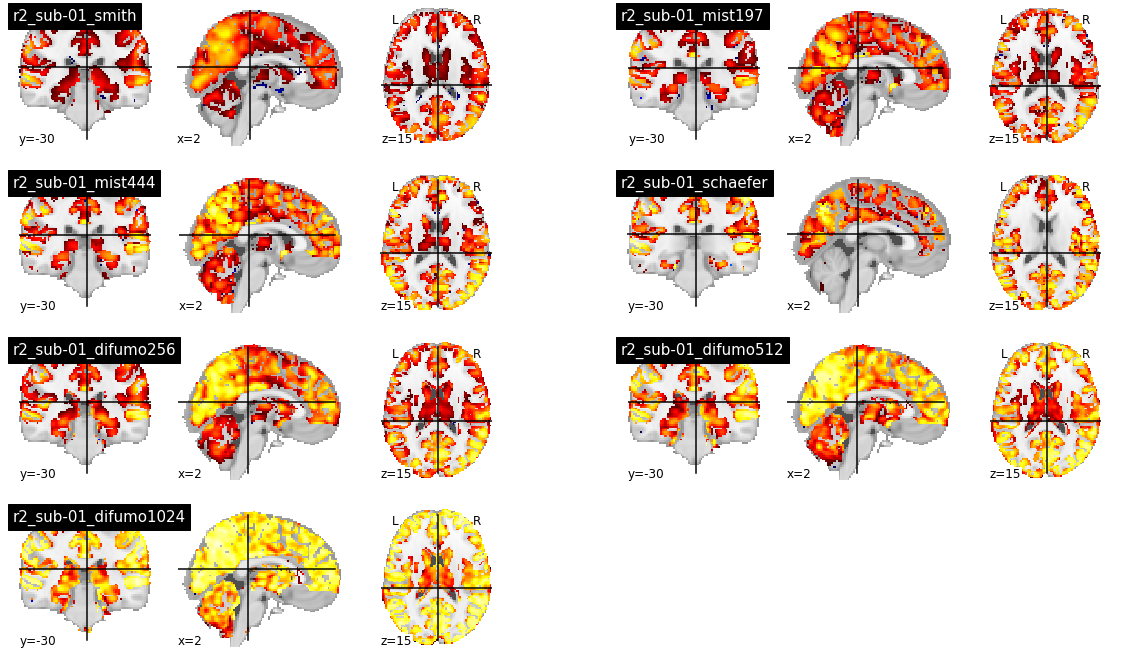

In [5]:
list_atlas = ['smith', 'mist197', 'mist444', 'schaefer', 'difumo256', 'difumo512', 'difumo1024']
n_comp = len(list_atlas)
width_fig = 20
fig = plt.figure(figsize=(width_fig, n_comp * 3))

for ind, atlas in enumerate(list_atlas):
    hdf5_file = load_r2_other(atlas=atlas, root_data=root_data, fwhm=fwhm)
    r2_atlas = mean_r2(hdf5_file[subject], ref_img=mask_img)
    plotting.plot_stat_map(r2_atlas, cut_coords=[2, -30, 15], display_mode='ortho', threshold=0.1,
            vmax=1, title=f'r2_{subject}_{atlas}', colorbar=False,
            axes=plt.subplot(n_comp, 2, ind + 1))

## Cortex, central structures and cerebellum masks
Motivated by these observations, we decided to quantify separately the R2 measures in the cortex, central structures and cerebellum, and focus on the cortex to select hyper-parameters and evaluate the generalization of embeddings in the rest of the study. We extracted for this purpose a subset of regions from the AAL atlas, dilated the AAL atlases to cover all of brain voxels, and intersected the resulting masks with individual grey matter masks used in this study (after resampling in individual structural space). The code to implement these operations is available in the module `cortical_segmentation.py`. It is possible to load the different types of masks using `_load_mask` in the `r2_summary.py` module, as illustrated in the code below:

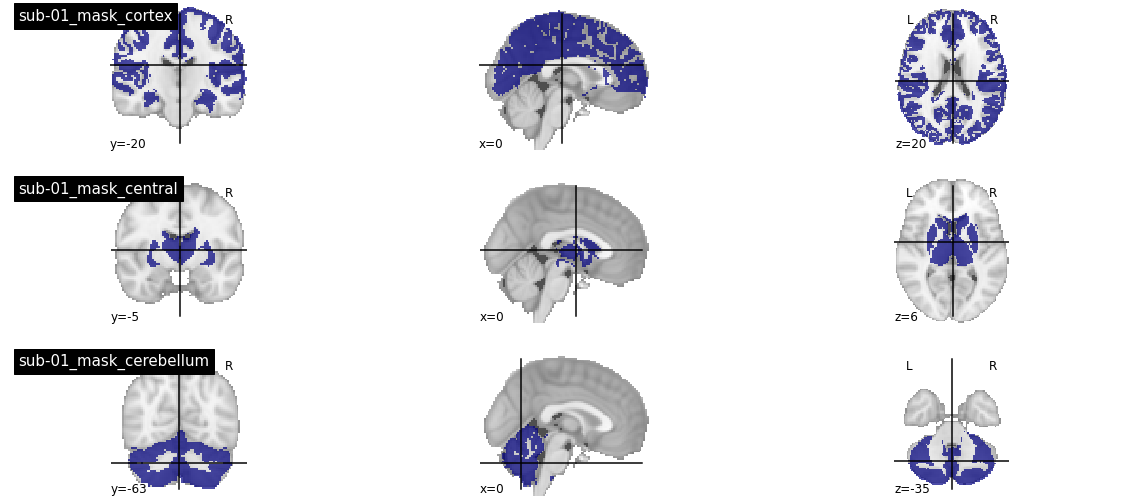

In [6]:
from nilearn.image import new_img_like
from cneuromod_embeddings.r2_summary import _load_mask
# the cluster and state parameters are just use to indicate which dypac 
# model to use to load the individual grey matter mask
# This mask is identical for all dypac models of the same subject

list_type = ['cortex', 'central', 'cerebellum']
n_comp = len(list_type)
width_fig = 20
fig = plt.figure(figsize=(width_fig, n_comp * 3))

for ind, type_mask in enumerate(list_type):
    mask = _load_mask(subject=subject, root_data=root_data, type_mask=type_mask, fwhm=fwhm, cluster=cluster, state=state)
    plotting.plot_roi(new_img_like(mask_img, mask), display_mode='ortho', threshold=0.1,
            vmax=1, title=f'{subject}_mask_{type_mask}', axes=plt.subplot(n_comp, 1, ind + 1))